# p_01 | Seaborn y Matplotlib

## Ejercicio 1

1. Lea los datos de [este link](https://catalogodatos.gub.uy/dataset/2db182ac-213c-4f2c-ba4e-ec31d8de0a09/resource/02e2bb65-2f48-4f98-b719-e472cd3b4ea0/download/datos_gastos-por-actos-medicos-fondo-nacional-de-recursos-2018.csv). Asigne el dataframe a la variable "data".
    * Cree bins de la variable de edad, siguiendo la siguiente secuencia: 0 a 9, 10 a 19,... Llame "Edad" a la nueva columna. *Ayuda: Revise como funciona el método `pd.cut`  de pandas y usar `right=False` dentro de `pd.cut`  para intervalossemi-abiertos en el lado derecho de los bins*
    * Convierta la variable **"importe"** a miles.
3. Cree un gráfico que muestre la distribución de la variable importe.
4. Muestre las distribuciones de la variable **"importe"** por **"sexo"** en un mismo gráfico. Las columnas de cada sexo en cada canasta deben estar lado a lado.
5. Grafique un ***swarmplot*** entre "Edad_anios" y "Sexo" para el departamento de Rivera.
6. Combine el gráfico anterior con un ***violinplot***.
7. Grafique la cantidad de intervenciones por tipo de prestador en cada uno de los departamentos.
8. Grafique un ***boxplot*** para cada canasta de edad. Recorte el eje que contiene el importe en 2000.
9. Grafique el importe promedio por tipo de prestador.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://catalogodatos.gub.uy/dataset/2db182ac-213c-4f2c-ba4e-ec31d8de0a09/resource/02e2bb65-2f48-4f98-b719-e472cd3b4ea0/download/datos_gastos-por-actos-medicos-fondo-nacional-de-recursos-2018.csv", sep=";", encoding="latin1")
bins = list(range(0, 110, 10)) + [np.inf]
data["Edad"] = pd.cut(data["Edad_anios"], bins=bins, right=False)
data["Importe"] = data["Importe"] / 1000
data.head()

,Anio,Area_prestacion,Prestacion,Paciente,Edad_anios,Sexo,Departamento_residencia,Prestador,Prestador_tipo,Importe,Edad
0,2018,ACTOS MÉDICOS CARDIOLOGÍA,Cardiodesfibrilador - Implante,7784291,80,M,PAYSANDU,COMEPA IAMPP,IAMC,433.959,"[80.0, 90.0)"
1,2018,ACTOS MÉDICOS CARDIOLOGÍA,Cardiodesfibrilador - Implante,7828497,77,M,MONTEVIDEO,CASMU,IAMC,415.466,"[70.0, 80.0)"
2,2018,ACTOS MÉDICOS CARDIOLOGÍA,Cardiodesfibrilador - Implante,7843820,57,F,CERRO LARGO,Hospital Policial,ASSE,415.466,"[50.0, 60.0)"
3,2018,ACTOS MÉDICOS CARDIOLOGÍA,Cardiodesfibrilador - Implante,7861168,67,M,MONTEVIDEO,Asociacion Española,IAMC,433.959,"[60.0, 70.0)"
4,2018,ACTOS MÉDICOS CARDIOLOGÍA,Cardiodesfibrilador - Implante,7870278,67,M,COLONIA,Hospital Evangelico,IAMC,440.867,"[60.0, 70.0)"


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23850 entries, 0 to 23849
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Anio                     23850 non-null  int64   
 1   Area_prestacion          23850 non-null  object  
 2   Prestacion               23850 non-null  object  
 3   Paciente                 23850 non-null  int64   
 4   Edad_anios               23850 non-null  int64   
 5   Sexo                     23850 non-null  object  
 6   Departamento_residencia  23850 non-null  object  
 7   Prestador                23850 non-null  object  
 8   Prestador_tipo           23850 non-null  object  
 9   Importe                  23850 non-null  float64 
 10  Edad                     23850 non-null  category
dtypes: category(1), float64(1), int64(3), object(6)
memory usage: 1.8+ MB


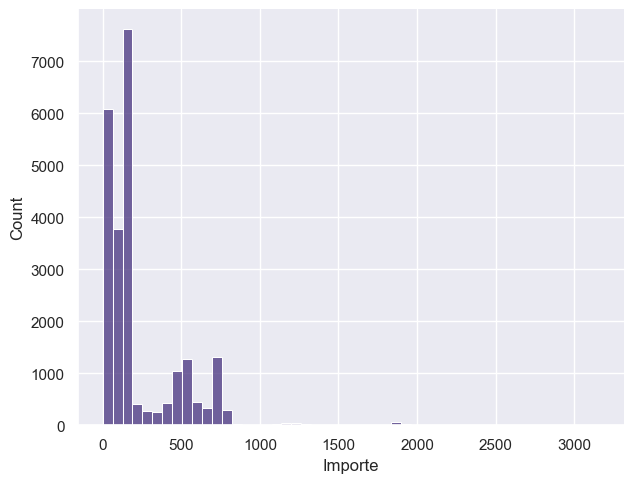

In [3]:
import seaborn as sns

sns.set_theme(rc={"figure.figsize": (10, 6)}, style="darkgrid", palette="viridis")

sns.displot(kind="hist", data=data, x="Importe",bins=50, height=5, aspect=1.3)

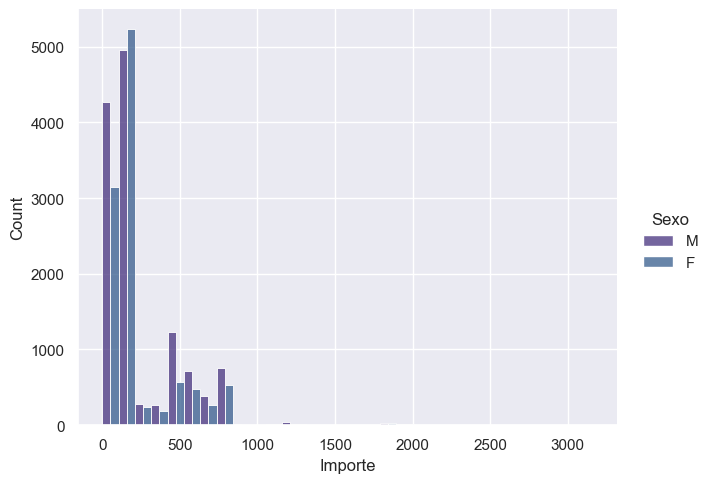

In [4]:
sns.displot(kind="hist", data=data, x="Importe", hue="Sexo", bins=30, height=5, aspect=1.3,multiple="dodge")

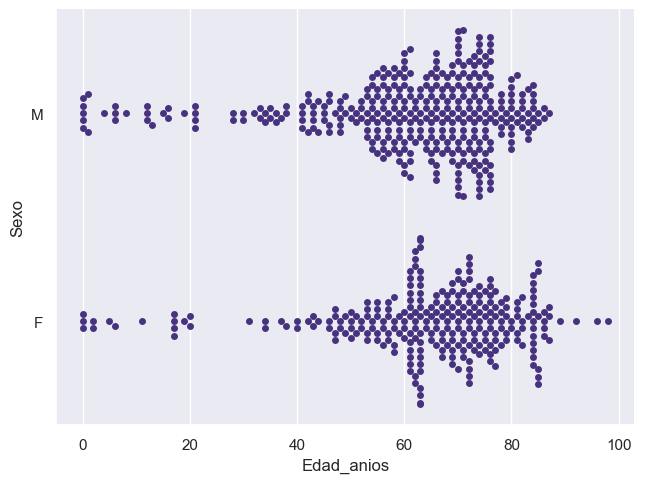

In [5]:
sns.catplot(kind="swarm", data=data.loc[data["Departamento_residencia"] == "RIVERA"], y="Sexo", x="Edad_anios", height=5, aspect=1.3)

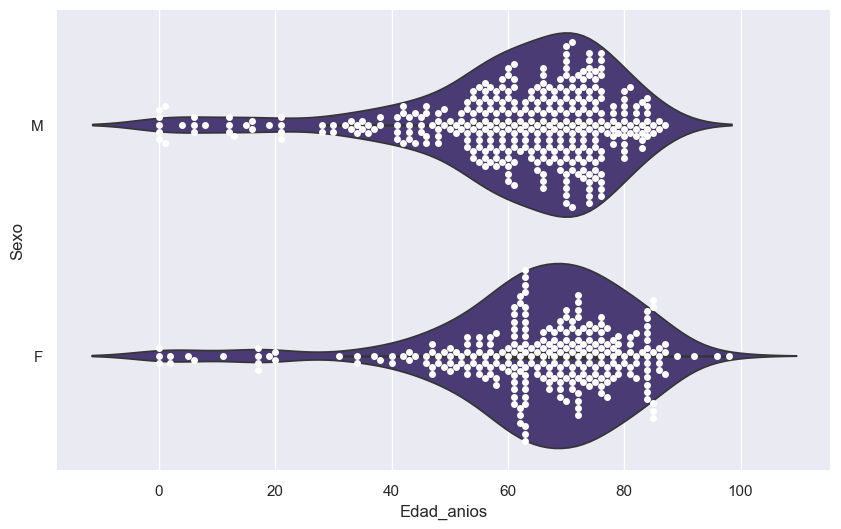

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.swarmplot(data=data.loc[data["Departamento_residencia"] == "RIVERA"], y="Sexo", x="Edad_anios", ax=ax, color="white")
sns.violinplot(data=data.loc[data["Departamento_residencia"] == "RIVERA"], y="Sexo", x="Edad_anios", ax=ax)
plt.show()

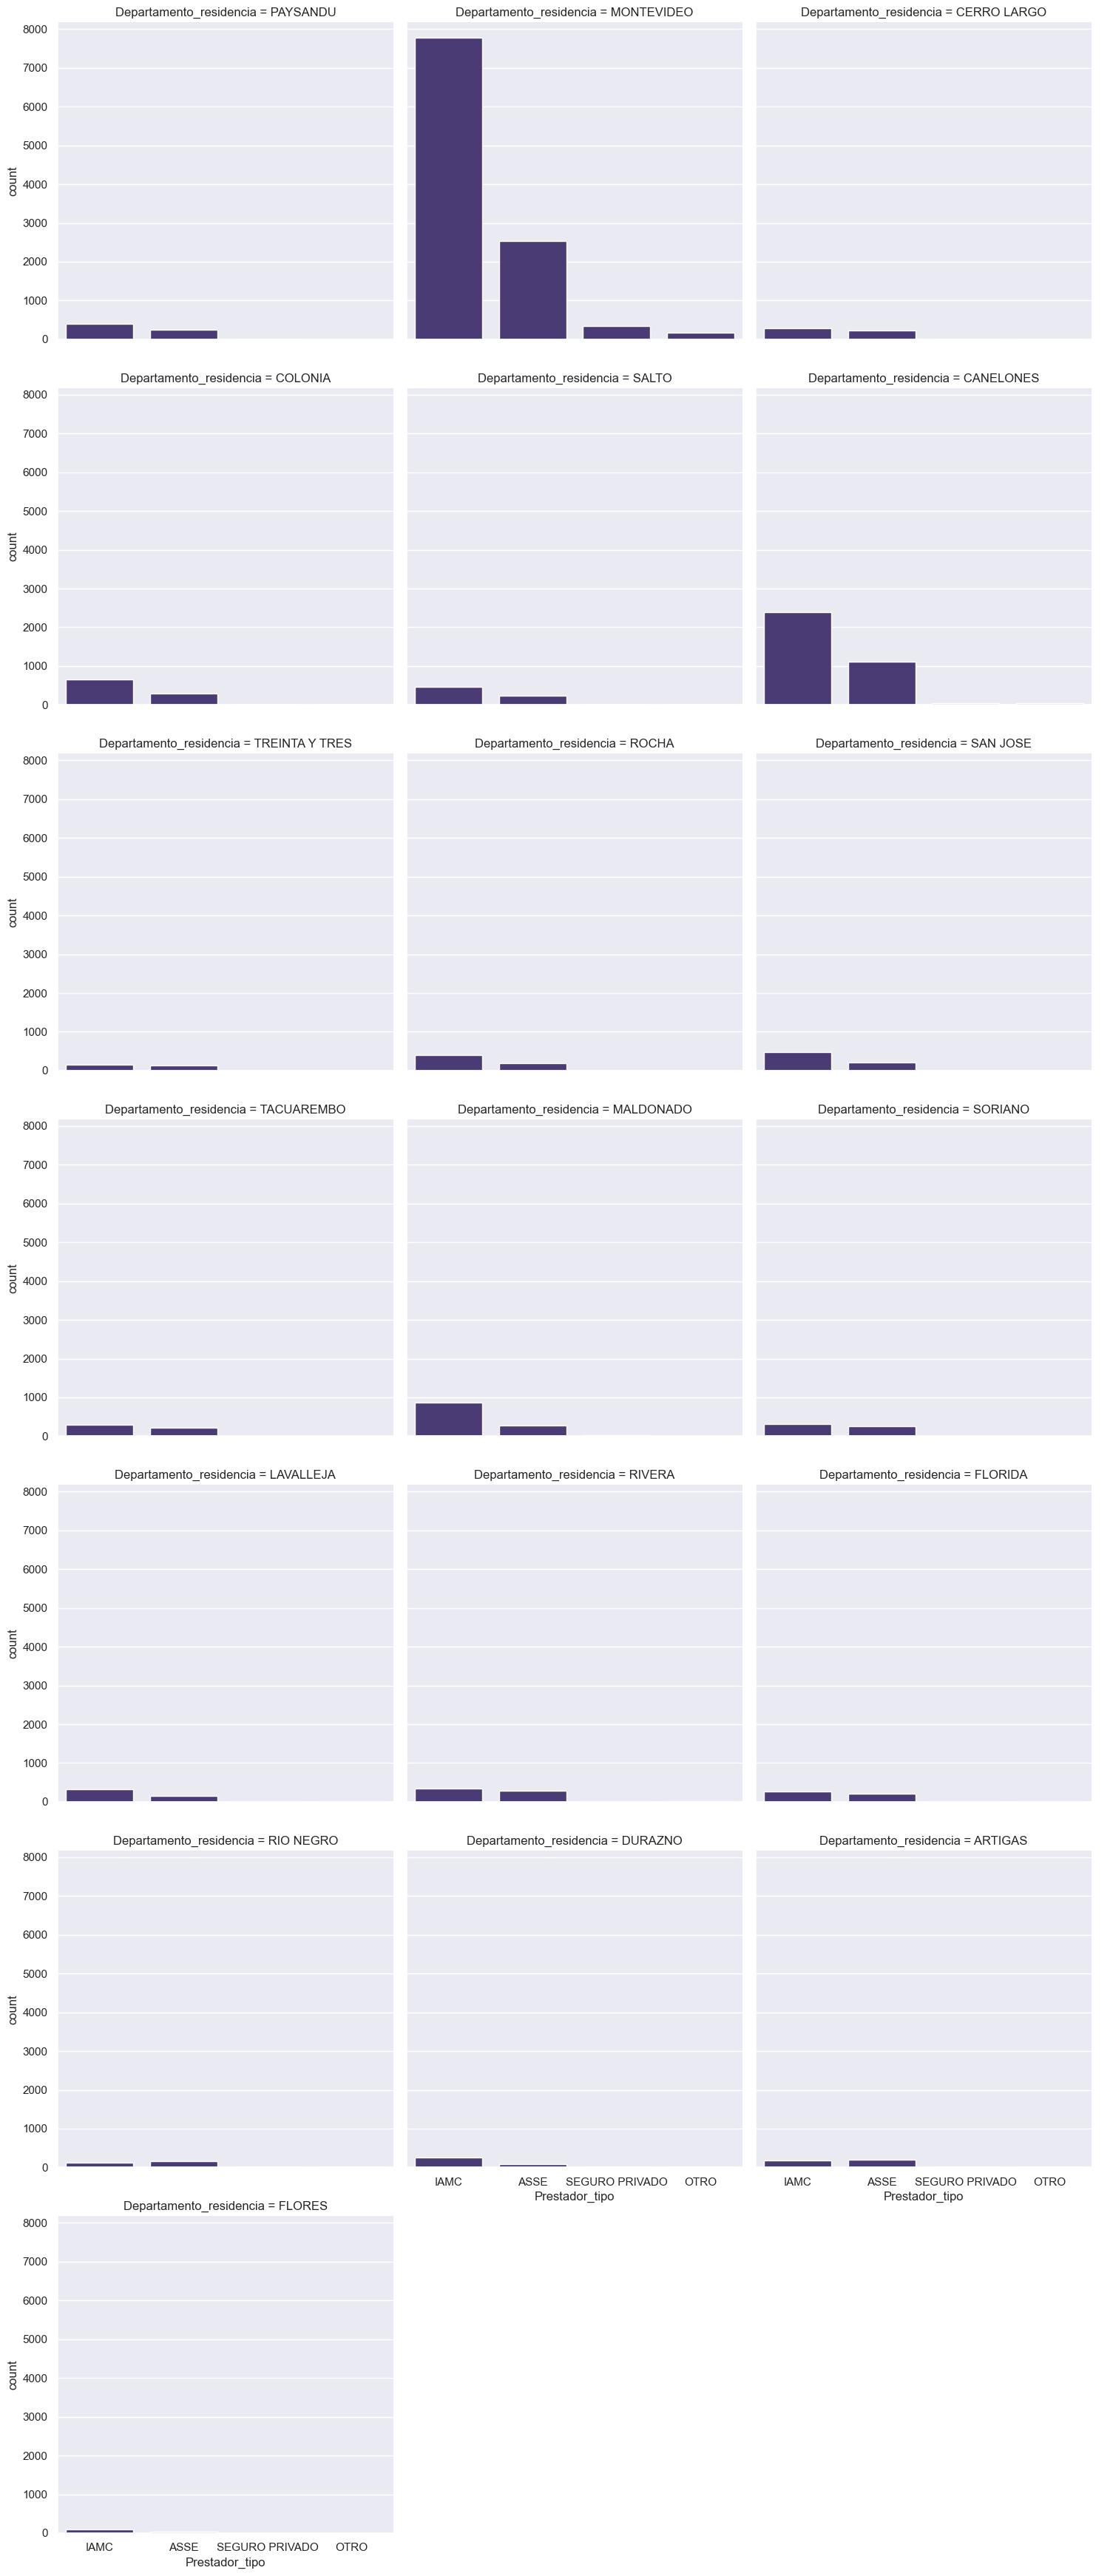

In [7]:
sns.catplot(kind="count", data=data, x="Prestador_tipo", col="Departamento_residencia", col_wrap=3)

(0.0, 2000.0)

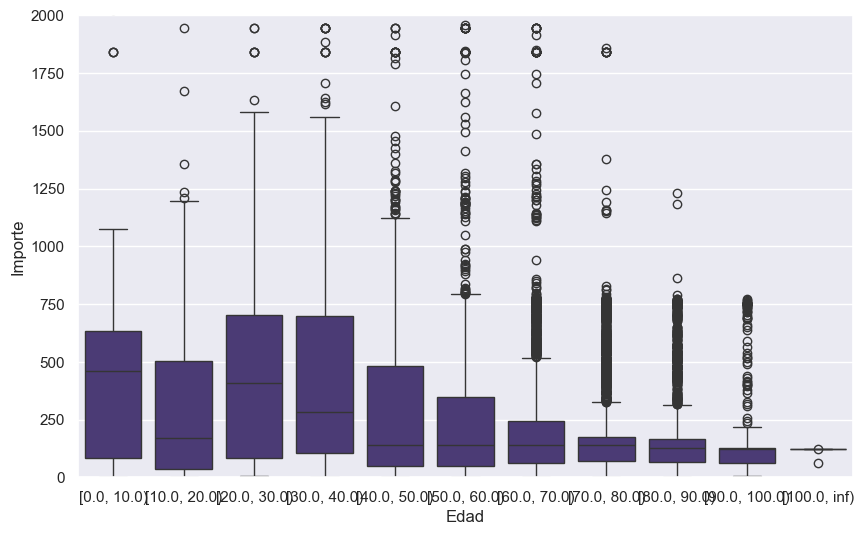

In [8]:
g = sns.boxplot(data=data, x="Edad", y="Importe")
g.set_ylim(0, 2000)

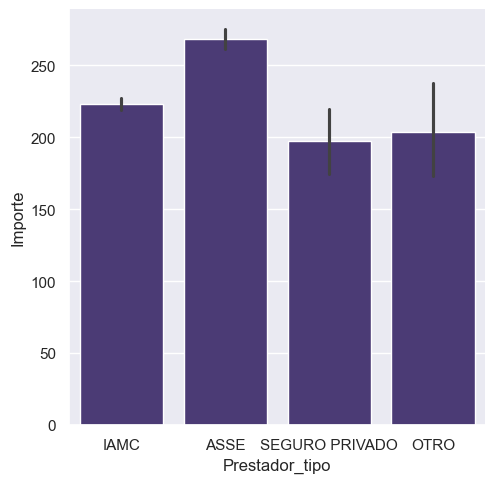

In [9]:
sns.catplot(kind="bar", data=data, x="Prestador_tipo", y="Importe")

## Ejercicio 2

1. Lea los datos de [este link](https://www.bcu.gub.uy/Servicios-Financieros-SSF/AFAPSeries/afesenafiliados.xls). Asigne el dataframe a la variable "afap". Recuerda eliminar las primeras filas que no son las columnas del dataframe con el parámetro `skiprows` de pandas.
    * Asigne el valor 0 a `NaN`
  * Parsee las fechas(*convertir cadenas de caracteres que representan fechas en formatos específicos a objetos de fecha y hora en un lenguaje de programación como datetime.* )
        * Agregue una columna que sea la suma de todas las AFAP excepto República (RAFAP). Llamele "Privadas".
        * Descarte la columna de total.
2. Transforme a datos long con el método `melt()`. Asigne este DataFrame a la variable "afap_long".
2. Grafique la evolución de los afiliados de todas las AFAP en el tiempo.
4. Compare los afiliados de RAFAP y Privadas.
5. Repita paso anterior, pero clasifique por año.
6. Cree un grid de 5 gráficos. Debe haber un gráfico grande a la izquierda y 4 más pequeños (dispuestos en 2x2) a la derecha. El grande debe mostrar la evolución del total del sistema, y los 4 la evolución de las AFAP activas hoy en día.

In [13]:

context = ssl._create_unverified_context()
df1 = pd.read_excel("https://www.bcu.gub.uy/Servicios-Financieros-SSF/AFAPSeries/afesenafiliados.xls",

                     skiprows=8, index_col=0)

TypeError: read_excel() got an unexpected keyword argument 'SSLContext'

In [ ]:
df2 = pd.read_excel("https://www.bcu.gub.uy/Servicios-Financieros-SSF/AFAPSeries/afesenafiliados.xls",index_col=0)

In [ ]:
df2.info()

In [ ]:
import numpy as np

afap = pd.read_excel("https://www.bcu.gub.uy/Servicios-Financieros-SSF/AFAPSeries/afesenafiliados.xls",
                     skiprows=8, index_col=0)
afap.index = pd.to_datetime(afap.index, format="%Y%m")
afap["Privadas"] = afap["TOTAL"] - afap["REPUBLICA"]
afap.replace(0, np.nan, inplace=True)
afap.drop("TOTAL", axis=1, inplace=True)
afap.dropna(how="all", axis=1, inplace=True)
afap.tail()

In [ ]:
afap_long = afap.reset_index().melt(id_vars="AÑO MES", var_name="AFAP", value_name="Afiliados")
afap_long.head()

In [ ]:
sns.lineplot(data=afap_long, y="Afiliados", hue="AFAP", x="AÑO MES", palette="viridis")

In [ ]:
sns.scatterplot(data=afap, x="REPUBLICA", y="Privadas")

In [ ]:
afap["Año"] = afap.index.year
sns.scatterplot(data=afap, x="REPUBLICA", y="Privadas", hue="Año", palette="Reds")

In [ ]:
fig = plt.figure(figsize=(12, 6))
gridsize = (2, 4)
ax1 = plt.subplot2grid(gridsize, (0, 0), rowspan=2, colspan=2)
ax2 = plt.subplot2grid(gridsize, (0, 2), sharex=ax1)
ax3 = plt.subplot2grid(gridsize, (0, 3), sharex=ax1)
ax4 = plt.subplot2grid(gridsize, (1, 2), sharex=ax1)
ax5 = plt.subplot2grid(gridsize, (1, 3), sharex=ax1)

sns.lineplot(data=afap.sum(axis=1), ax=ax1)
ax1.set_ylabel("Total")
ax1.set_xlabel("")
for ax, s in zip([ax2, ax3, ax4, ax5], ["REPUBLICA", "AFAP SURA", "UNION CAPITAL", "INTEGRACION"]):
    sns.lineplot(data=afap, y=s, x="AÑO MES", ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel("")
fig.tight_layout()
#fig.autofmt_xdate()

# Fin